In [ ]:
#PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [ ]:
!pip install matplotlib scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [ ]:
# Load the dataset
df = pd.read_csv('/content/forestfires.csv')

In [ ]:
# Display the first few rows of the dataset
print(df.head())

  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  

In [ ]:
# Extract features and target variable
X = df.drop(['size_category'], axis=1)  # Features
y = df['size_category']  # Target variable

In [ ]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['month', 'day'], drop_first=True)

In [ ]:
# Convert target variable to numerical values (if needed)
y = y.map({'small': 0, 'large': 1})

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' activation for binary classification

In [ ]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
11/11 - 1s - loss: 0.6612 - accuracy: 0.7121 - val_loss: 0.5653 - val_accuracy: 0.7590 - 1s/epoch - 117ms/step
Epoch 2/50
11/11 - 0s - loss: 0.6124 - accuracy: 0.7212 - val_loss: 0.5504 - val_accuracy: 0.7831 - 48ms/epoch - 4ms/step
Epoch 3/50
11/11 - 0s - loss: 0.5862 - accuracy: 0.7273 - val_loss: 0.5371 - val_accuracy: 0.7952 - 63ms/epoch - 6ms/step
Epoch 4/50
11/11 - 0s - loss: 0.5641 - accuracy: 0.7394 - val_loss: 0.5307 - val_accuracy: 0.7952 - 66ms/epoch - 6ms/step
Epoch 5/50
11/11 - 0s - loss: 0.5438 - accuracy: 0.7485 - val_loss: 0.5249 - val_accuracy: 0.7952 - 50ms/epoch - 5ms/step
Epoch 6/50
11/11 - 0s - loss: 0.5234 - accuracy: 0.7515 - val_loss: 0.5210 - val_accuracy: 0.8072 - 65ms/epoch - 6ms/step
Epoch 7/50
11/11 - 0s - loss: 0.5062 - accuracy: 0.7576 - val_loss: 0.5189 - val_accuracy: 0.8193 - 68ms/epoch - 6ms/step
Epoch 8/50
11/11 - 0s - loss: 0.4897 - accuracy: 0.7636 - val_loss: 0.5162 - val_accuracy: 0.8193 - 48ms/epoch - 4ms/step
Epoch 9/50
11/11 - 0s - 

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy on Test Set: {accuracy}')

4/4 [==============================] - 0s 5ms/step - loss: 0.4859 - accuracy: 0.8750
Accuracy on Test Set: 0.875


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[73  3]
 [10 18]]


In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

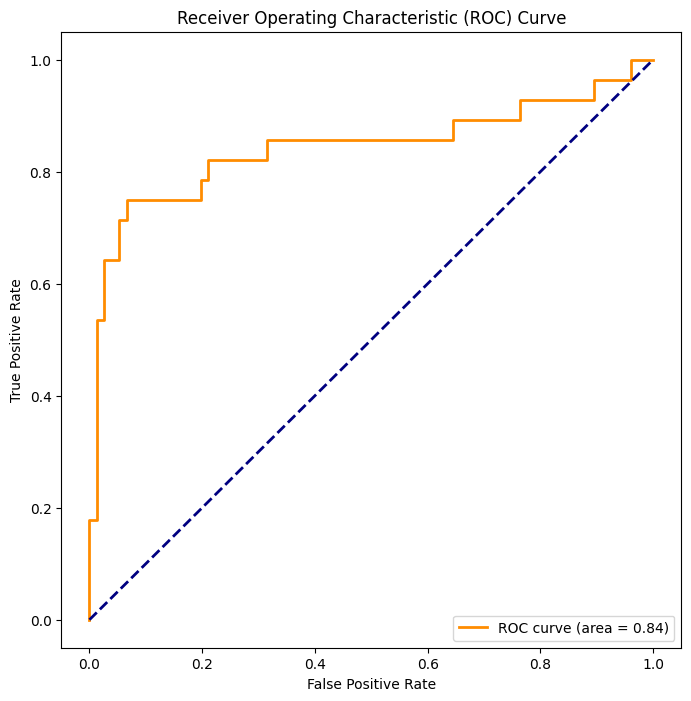

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

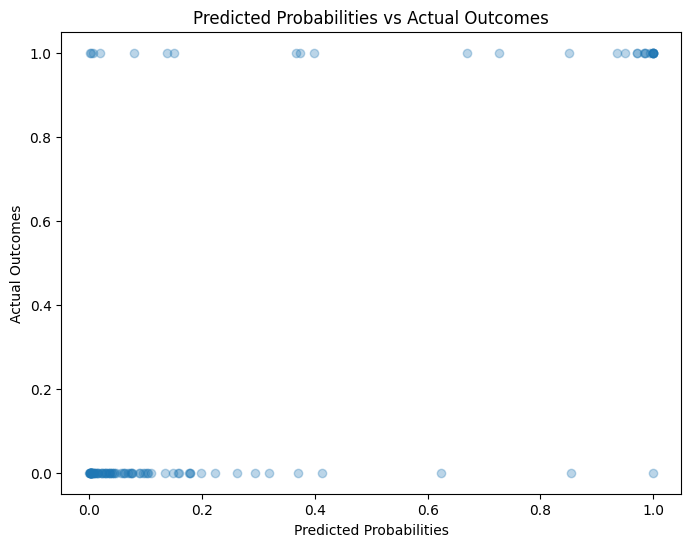

In [ ]:
# Predicted Probabilities vs Actual Outcomes
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, alpha=0.3)
plt.title('Predicted Probabilities vs Actual Outcomes')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Actual Outcomes')
plt.show()